# Applied Challenge Präsentation
### Jonas Neskudla, Niklas Dreiner, Lennard Schwarz
### 15.07.2018

# Datenbeschaffung

R Code:
lädt die aktuellsten Crypto Daten runter und fügt sie unserem Datensatz hinzu

In [12]:
library(crypto)

cryptos <- crypto_history(coin = 'bitcoin', start_date = 20180701, end_date = 20180710)

write.table(cryptos, "unsere_cryptos.csv", sep = ",", col.names = F, append = T, row.names = F)

SyntaxError: keyword can't be an expression (<ipython-input-12-51ce2c45e912>, line 5)

Python Code: lädt Daten von alternativer https://coinmetrics.io/data/ Quelle herunter und fügt den Namen der Datei als Spalte an die .csv an für das weitere processing an.

In [13]:
import csv
import inspect, os
import requests
import tarfile
import pandas as pd


# get the data
url = 'https://coinmetrics.io/data/all.tar.gz'  #data URL
r = requests.get(url) #call URL

#save file as "crypto.tar.gz"
with open('Data/crypto.tar.gz', 'wb') as f:  
    f.write(r.content)

#extract .tar.gz and save to folder "crypto" in Data folder
tar = tarfile.open('Data/crypto.tar.gz') 
tar.extractall(path='Data/crypto')
tar.close() 


for file in os.listdir(os.getcwd() + '/Data/crypto'):
    if file.endswith(".csv"):
                 
        filename = os.path.splitext(file)[0] #ohne endung
        filename2 = (os.path.normpath(file)) # mit endung

        #filepath_in = os.path.realpath(file) schneidet letzte zwei Ordner weg, deswegen die Zeile drunter
        filepath_in = os.path.dirname(os.path.abspath(file)) + "/Data/crypto/" + filename2
        filepath_out = filepath_in[0:-4] + "_neu" + ".csv"
        if "neu" not in filename:
            with open(filepath_in,'r') as csvinput:
                with open(filepath_out, 'w') as csvoutput:
                    os.remove(filepath_in)
                    writer = csv.writer(csvoutput, lineterminator='\n')
                    reader = csv.reader(csvinput)

                    all = []
                    row = next(reader)

                    row.append('currencyName')
                    all.append(row)
                    row_length = len(row)

                    for row in reader:
                        try:
                            row[row_length-1] = filename
                            all.append(row)
                        except:
                            print("Schonmal konvertiert")
                    
                    writer.writerows(all)

# Data Understanding

In [14]:
import pandas as pd
import numpy as np

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go 

In [15]:
#read in crypto-markets.csv in pandas DF

#lade von CSV
df = pd.read_csv("Data/crypto-markets.csv", sep="," )


#print("data collected")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796075 entries, 0 to 796074
Data columns (total 13 columns):
slug           796075 non-null object
symbol         796075 non-null object
name           796075 non-null object
date           796075 non-null object
ranknow        796075 non-null int64
open           796075 non-null float64
high           796075 non-null float64
low            796075 non-null float64
close          796075 non-null float64
volume         796075 non-null float64
market         796075 non-null float64
close_ratio    796075 non-null float64
spread         796075 non-null float64
dtypes: float64(8), int64(1), object(4)
memory usage: 79.0+ MB


In [16]:
#count frequency of each curreny to determine which currencys we could potentially drop
df_grouped = df.groupby('name').size()
df_ranked = df_grouped.rank()
df_sorted = df_grouped.sort_values(ascending=False)
#df_sorted

#group data by date and number of currencies traded that day
#returnes Pandas.Series
df_grouped = df.groupby('date').size()
#df_grouped

#set index for column 'values'
#returns DataFrame
df_groupedDF = df_grouped.reset_index(name='values')

#df_groupedDF
print(df_sorted)

name
Litecoin            1902
Namecoin            1902
Bitcoin             1902
Peercoin            1901
Novacoin            1901
Feathercoin         1897
Terracoin           1887
BitBar              1874
WorldCoin           1863
Digitalcoin         1859
GoldCoin            1848
Primecoin           1828
Megacoin            1827
Anoncoin            1808
XRP                 1804
Ixcoin              1800
Freicoin            1799
Bullion             1799
Infinitecoin        1790
Quark               1781
Phoenixcoin         1767
Zetacoin            1763
Fastcoin            1736
TagCoin             1710
Argentum            1700
FlorinCoin          1689
CasinoCoin          1688
Nxt                 1682
Deutsche eMark      1671
Sexcoin             1671
                    ... 
Bob's Repair          10
ZINC                   9
Forty Seven Bank       8
Mainframe              8
Clipper Coin           8
Project Pai            8
OTCBTC Token           8
On.Live                8
Thrive Token        

### Anzahl handelbarer Währungen im Zeitverlauf

In [17]:
#create pyplot showing number of currencies traded each day 

trace0 = go.Scatter(
    x= df_groupedDF['date'], 
    y= df_groupedDF['values'],
    name='density',
    mode = 'lines',
    line = dict(
        color = ('rgb(204,0,0)'),
        width = 1)
       
    

)

data = [trace0]
layout = go.Layout(
    title='Cryptowährungen',
    yaxis={
        'title': 'Anzahl handelbare Währungen',
        'nticks': 10,
        
    },
    xaxis={
        'title': 'Zeitraum',
        'nticks': 20,
    }
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='cryto-overview')

### Dichtediagramm der "Lebenszeit" von Cryptowährungen

In [18]:
#Dichte Diagramm -> Wie viele Tage wurden die Coins überhaupt getraded?

import plotly.offline as py
import plotly.graph_objs as go
import numpy as np


df_density = df_grouped = df.groupby('name').size()
df_densityDF = df_density.reset_index(name='values')
                                      
trace0 = go.Histogram(
    x=df_densityDF['values'],
    xbins=dict(
        start=0,
        end=2500,
        size=15),
    marker=dict(
        color=('rgb(230,0,0)'),
    ),
    opacity=1
)
  
data = [trace0]

layout = go.Layout(
    title='Dichtediagramm der "Lebenszeit" von Cryptowährungen',
    xaxis=dict(
        title='Anzahl gehandelter Tage'
    ),
    yaxis=dict(
        title='Menge gehandelter Coins'
    ),
    bargap=0.2,
    bargroupgap=0.1
    )

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='density_Crypto')

## Regressionsanalyse

In [19]:
#Initmessage
print ("starting Regression") 

#lade CSV
data_frame_investigated = pd.read_csv("Data/crypto-markets.csv", sep="," )


print("data collected")

print(data_frame_investigated.head())

starting Regression
data collected
      slug symbol     name        date  ranknow    open    high     low  \
0  bitcoin    BTC  Bitcoin  2013-04-28        1  135.30  135.98  132.10   
1  bitcoin    BTC  Bitcoin  2013-04-29        1  134.44  147.49  134.00   
2  bitcoin    BTC  Bitcoin  2013-04-30        1  144.00  146.93  134.05   
3  bitcoin    BTC  Bitcoin  2013-05-01        1  139.00  139.89  107.72   
4  bitcoin    BTC  Bitcoin  2013-05-02        1  116.38  125.60   92.28   

    close  volume        market  close_ratio  spread  
0  134.21     0.0  1.500520e+09       0.5438    3.88  
1  144.54     0.0  1.491160e+09       0.7813   13.49  
2  139.00     0.0  1.597780e+09       0.3843   12.88  
3  116.99     0.0  1.542820e+09       0.2882   32.17  
4  105.21     0.0  1.292190e+09       0.3881   33.32  


In [23]:
#eliminiere redundante Attribute
REDUNDANT_ATTRIBUTES=['symbol','name'] 
data_frame_investigated.drop(REDUNDANT_ATTRIBUTES,axis=1,inplace=True) #loeschen aus Dataframe


print(data_frame_investigated.head())

      slug        date  ranknow    open    high     low   close  volume  \
0  bitcoin  2013-04-28        1  135.30  135.98  132.10  134.21     0.0   
1  bitcoin  2013-04-29        1  134.44  147.49  134.00  144.54     0.0   
2  bitcoin  2013-04-30        1  144.00  146.93  134.05  139.00     0.0   
3  bitcoin  2013-05-01        1  139.00  139.89  107.72  116.99     0.0   
4  bitcoin  2013-05-02        1  116.38  125.60   92.28  105.21     0.0   

         market  close_ratio  spread  
0  1.500520e+09       0.5438    3.88  
1  1.491160e+09       0.7813   13.49  
2  1.597780e+09       0.3843   12.88  
3  1.542820e+09       0.2882   32.17  
4  1.292190e+09       0.3881   33.32  


### Regressionsmodell

Regressionen jeden Coins mit abhänginger Variable 'close'. Als abhängige Variablen wurden die 'close' Preise aller gleichzeitig gehandelten Währungen gewählt

In [25]:
from sklearn.model_selection import train_test_split #library fuer Split
from sklearn import linear_model #lineare Regression
import math #import fuer msqError
from sklearn.metrics import mean_squared_error

#dependency :patsy

def cryptoregress(crypto_id, feature_to_compare,crypto_id_feature_name="slug",
                 documentMode=True):
    """
    lineare Regression zur Bestimmung eines Features anhand gleichen Features der anderen Cryptos
    """
    #Cryptos Gruppieren
    
    #ich kann nur anhand von Tagen schliessen, an denen die Crypto Existiert
    #erstmal alle Tage holen an denen die Crypto gehandelt wird
    dates_of_crypto_trade= data_frame_investigated[
        data_frame_investigated[crypto_id_feature_name] == crypto_id
    ]['date']
    

   
    if documentMode: print(dates_of_crypto_trade.head())
    
    #dann die Tupel Filtern, nur die Tage an denen Crypto getraded wird uebernehmen,
    #nur compare feature uebernehmen
    data_frame_id_exists= data_frame_investigated[
        data_frame_investigated['date'].isin(dates_of_crypto_trade)
    ][['date',crypto_id_feature_name,feature_to_compare]]
    
    
    
    #daten Pivotieren so dass Cryptos zu columns werden
    data_frame_id_exists= data_frame_id_exists.pivot(
        index='date', columns=crypto_id_feature_name, values=feature_to_compare
        ).reset_index()
    
    
    #collumns loeschen die Nullwerte enthalten
    data_frame_id_exists=data_frame_id_exists.dropna(axis='columns')
 
    
   # data_frame_id_exists=data_frame_id_exists.fillna(value=0)
    
    
   
    #date rausloeschen
    data_frame_id_exists.drop('date',axis=1,inplace=True)
    if documentMode: print("cleaned Frame")
    if documentMode: print(data_frame_id_exists.head())
    
    ###############Train Test Split:
    #Ergebnis vom Features trennen:
    Y = data_frame_id_exists[[crypto_id]]
    data_frame_id_exists.drop(crypto_id,axis=1, inplace = True)
    if documentMode: print("Regress to:")
    if documentMode: print(Y.head())

    
        
    feature_train, feature_test, y_train, y_test = train_test_split (
        data_frame_id_exists,
        Y,
        test_size=0.1
    )

    ##############Regressionsmodell machen
    regression_model = linear_model.LinearRegression(
        fit_intercept=True, normalize=False, copy_X=True, n_jobs=-1)


        #regressionsmodell fitten
    regression_model.fit(feature_train, y_train)
    Rsquared_train = regression_model.score(feature_train,y_train)
    Rsqared_test = regression_model.score(feature_test,y_test)
    MeanError_train = math.sqrt( mean_squared_error(regression_model.predict(feature_test),y_test))
    MeanError_test = math.sqrt( mean_squared_error(regression_model.predict(feature_train),y_train))
                                    
    if documentMode: print("RSquared train:",Rsquared_train)
    if documentMode: print("RSquared test:",Rsqared_test)
    if documentMode: print("MeanSqure train:", MeanError_train)
    if documentMode: print("MeanSqure test:", MeanError_test)
    
    return [regression_model,
            Rsquared_train,
            Rsqared_test,
            MeanError_train,
            MeanError_test,
            list(data_frame_id_exists),
           ]
       

    
regression_result=cryptoregress('bitcoin','close')

0    2013-04-28
1    2013-04-29
2    2013-04-30
3    2013-05-01
4    2013-05-02
Name: date, dtype: object
cleaned Frame
slug  bitcoin  litecoin  namecoin
0      134.21      4.35      1.11
1      144.54      4.38      1.33
2      139.00      4.30      1.50
3      116.99      3.80      1.21
4      105.21      3.37      1.07
Regress to:
slug  bitcoin
0      134.21
1      144.54
2      139.00
3      116.99
4      105.21
RSquared train: 0.9313447708174326
RSquared test: 0.9461040123757734
MeanSqure train: 769.3581623432118
MeanSqure test: 879.5779063761942


In [26]:
print(regression_result)

[LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False), 0.9313447708174326, 0.9461040123757734, 769.3581623432118, 879.5779063761942, ['litecoin', 'namecoin']]


In [22]:
#make a  list of the different coins
different_coins = data_frame_investigated.slug.unique()
print(different_coins)

['bitcoin' 'ethereum' 'ripple' ... 'sisa' 'entcash' 'numuscash']


In [ ]:
#iteriere durch die Liste und fuehre Regressionsanalyse durch
list_regression = []
zaehler=0
if False:
    for current_coin_to_regress in different_coins:
        list_regression.append(
            {
                'name':current_coin_to_regress,
                'RsquaredTest': cryptoregress(current_coin_to_regress,'close')[2]
            }) #fuege ergebnis zur Ergebnistabelle hinzu
        zaehler=zaehler+1
        print("regressed Number ", zaehler, " von ", len(different_coins))
        if zaehler == 1300: break #Datensätze werden zu klein

    zaehler= 0
    df_regression_result=pd.DataFrame(list_regression)
    print(df_regression_result)

In [ ]:
#df_regression_result.to_csv("regression_results.csv",sep=',') #Regrssionsergebnisse in csv Speichern

In [27]:
######Importiere Plotly Tools
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go 

"""
Graphische Darstellung von der Verteilung von Rsquared als Histogramm
"""


df_regression_result = pd.read_csv("regression_results.csv",sep=',') #Regressionsergebnisse wieder reinladen


#Histogrammobjekt erstellen
trace0 = go.Histogram(
    x= df_regression_result['RsquaredTest'],histnorm='probability',
    autobinx=False,
    xbins=dict(
        start=0,
        end=1,
        size=0.01
    ),
    cumulative=dict(enabled=True)
    
           

)

data = [trace0]
layout = go.Layout(
    title='RSquared Verteilung',
    xaxis = dict(range=[0, 1])

)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='cryto-regression')

## Klassifizierer (AdaBoost)

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split #library fuer Split
from sklearn import linear_model #lineare Regression
from sklearn import metrics 
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

In [29]:
#lade von CSV
data_frame_investigated = pd.read_csv("Data/crypto-markets.csv", sep="," )

#print("data collected")

#print(data_frame_investigated.head())

In [30]:
#eliminiere redundante Attribute
REDUNDANT_ATTRIBUTES=['symbol','name'] 
data_frame_investigated.drop(REDUNDANT_ATTRIBUTES,axis=1,inplace=True) #loeschen aus Dataframe
#print(data_frame_investigated.head())

### Führe Label "Trend" ein

In [31]:
# bestimme Trends. (1 für steigender Kurs, 0 für sinkenden Kurs)

df = data_frame_investigated['close'].shift(periods=-1).to_frame()
data_frame_investigated['close_s'] = df

data_frame_investigated = data_frame_investigated[data_frame_investigated['slug'] == 'bitcoin']
data_frame_investigated['trend'] = 5

for i, r in data_frame_investigated.iterrows():
    
    if r["close"] < r["close_s"]:
        #Kurs steigt anschließend
        #data_frame_investigated = data_frame_investigated.set_value(index =i, col = ['trend'], value = 1)
        data_frame_investigated.at[i, 'trend'] = 1
    else:
        #Kurs fällt anschließend
        #data_frame_investigated = data_frame_investigated.set_value(index =i, col = ['trend'], value = 0)  
        data_frame_investigated.at[i, 'trend'] = 0
        
#Y Wert für Klassifizierer -> Trendwerte als eigene Spalte
data_frame_trend = data_frame_investigated['trend'].to_frame() 

In [32]:
np.size(data_frame_trend)

1902

### Adaboost Classifier

In [33]:
def cryptoclassifier(crypto_id, feature_to_compare,crypto_id_feature_name="slug", documentMode=True):
    
    #Cryptos Gruppieren
    
    #ich kann nur anhand von Tagen schliessen, an denen die Crypto Existiert
    #erstmal alle Tage holen an denen die Crypto gehandelt wird
    dates_of_crypto_trade= data_frame_investigated[
        data_frame_investigated[crypto_id_feature_name] == crypto_id
    ]['date']
    
   
    #print(dates_of_crypto_trade.head())
    
    #dann die Tupel Filtern, nur die Tage an denen Crypto getraded wird uebernehmen,
    #nur compare feature uebernehmen
    data_frame_id_exists= data_frame_investigated[
        data_frame_investigated['date'].isin(dates_of_crypto_trade)
    ][['date',crypto_id_feature_name,feature_to_compare]]
    
    #daten Pivotieren, so dass Cryptos zu columns werden
    data_frame_id_exists= data_frame_id_exists.pivot(
        index='date', columns=crypto_id_feature_name, values=feature_to_compare
        ).reset_index()
    
 
    
    data_frame_id_exists=data_frame_id_exists.fillna(value=0)
    data_frame_id_exists=data_frame_id_exists.dropna()
    
   
    #date rausloeschen
    data_frame_id_exists.drop('date',axis=1,inplace=True)
    #print("cleaned Frame")
    #print(data_frame_id_exists.head())
    data_frame_for_predictions = data_frame_id_exists #copy data_frame_id_exists just for safety purposes
    
    #print("Größe data_frame_for_predictions:", np.size(data_frame_for_predictions))
    
    ###############Train Test Split:
    Y = data_frame_trend.values.ravel() #changes Y from collumn to 1d array
    
    #check size of Y
    #print(np.size(Y)) 
    
    
    feature_train, feature_test, y_train, y_test = train_test_split (
        data_frame_id_exists,
        Y,
        test_size=0.1
    )

    ##############Classifier machen
    classifier_model = AdaBoostClassifier(
        base_estimator=None, learning_rate=0.5, n_estimators=100, random_state=123)



        #Classifier fitten
    classifier_model.fit(feature_train, y_train) #trains Classifier with test_split
    Score_train = classifier_model.score(feature_train,y_train) #score test score value
    Score_test = classifier_model.score(feature_test,y_test) #model score value
    predictions = classifier_model.predict(data_frame_for_predictions) #predicts y data on basis of classifier
    confusionMatrix = confusion_matrix(Y, predictions)
    Bias = ((confusionMatrix[1][1]+confusionMatrix[0][1])/(confusionMatrix[0][0]+confusionMatrix[0][1]+confusionMatrix[1][0]+confusionMatrix[1][1]))
    
    if documentMode: print("Score train:", Score_train)
    if documentMode: print("Score test:", Score_test)
    if documentMode: print("Bias:", Bias)
    #if documentMode: print("Classifier Predictions:", predictions)
    if documentMode: print('Confusion Matrix in Form: tn, fp, fn, tp \n', confusionMatrix)

    #dont delete values
    return [classifier_model,
            Score_train,
            Score_test,
            feature_train,
            y_train,
            feature_test,
            y_test,
            list(data_frame_id_exists),
            list(predictions),
            Y,
            predictions
           ]


#Hier können Parameter übergeben werden: 
#auf Basis welches Parameters der anderen Coins ('close', 'spread', 'volume', etc.) soll klassifiziert werden?
classifier_result=cryptoclassifier('bitcoin','close') 

Score train: 0.5739333722969024
Score test: 0.5759162303664922
Confusion Matrix in Form: tn, fp, fn, tp 
 [[178 687]
 [123 914]]


### ROC Kurve

In [35]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(classifier_result[9], classifier_result[10])
roc_auc = auc(fpr,tpr)

print("tpr: ",tpr)
print("fpr: "fpr)
print("thresholds ",thresholds)

[0.         0.88138862 1.        ]
[0.         0.79421965 1.        ]
[2 1 0]


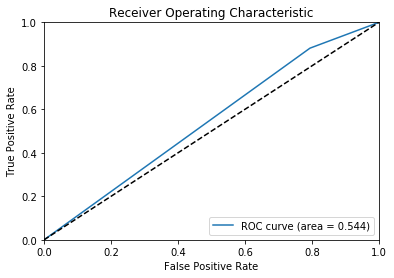

In [36]:
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("figures/ROC_AdaBoost_bitcoin", bbox_inches="tight", dpi=200)
plt.show()

### Classifier Score mit sich verändernder learning rate [0.05 , 1]

Score steigt nicht nicht über 60%.

In [37]:
#For each learning rate new clasifier run
list_adascores = []

for l_rate in np.arange(0.05,1,0.05):
    
    classifier_model = AdaBoostClassifier(
        base_estimator=None, learning_rate=l_rate, n_estimators=100, random_state=123)
    
    classifier_model.fit(classifier_result[3], classifier_result[4]) #trains Classifier with test_split
    Score_test = classifier_model.score(classifier_result[5], classifier_result[6]) #model score value
    
    list_adascores.append(Score_test)
    
print(list_adascores)

[0.5497382198952879, 0.5497382198952879, 0.5706806282722513, 0.5706806282722513, 0.5706806282722513, 0.5706806282722513, 0.5706806282722513, 0.5759162303664922, 0.5759162303664922, 0.5759162303664922, 0.5863874345549738, 0.5759162303664922, 0.5968586387434555, 0.5549738219895288, 0.5340314136125655, 0.5549738219895288, 0.5549738219895288, 0.5759162303664922, 0.5706806282722513]


## TensorFlow

In [38]:
#Importiere Libraries
import pandas as pd
import numpy as np
import matplotlib as plt
from datetime import datetime as dt
import os


#Initmessage
print ("starting Tensorflow") 

#lade von CSV
data_frame_investigated = pd.read_csv("Data/crypto-markets.csv", sep=",",encoding='utf-8' )


print("data collected")


data_frame_investigated.head()

#Neue Modellgewichte errechnen?: Standard = True
Y_FIT_MODELL = False

starting Tensorflow
data collected


In [ ]:
# Daten abgrenzen
def get_weekDay(currentDate):#Wochentag ermitteln 0 Montag - > 6 Sonntag
    currentDate = dt.strptime( currentDate, '%Y-%m-%d')
    return currentDate.weekday()
def get_monthDay(currentDate):
    currentDate = dt.strptime( currentDate, '%Y-%m-%d')
    return currentDate.day

#Wochentag in dataframe
data_frame_investigated['weekday'] = data_frame_investigated['date'].apply(get_weekDay)
#monatstag [0-31] in dataframe
data_frame_investigated['day'] = data_frame_investigated['date'].apply(get_monthDay)

#Liste der slugs machen
#make a  list of the different coins
different_coins = data_frame_investigated.slug.unique()
print(different_coins)


data_frame_investigated.head()

In [ ]:
#mache Date zu Datetime objekt
data_frame_investigated['date']=pd.to_datetime(
    data_frame_investigated['date'],yearfirst=True
)

In [ ]:
#eliminiere redundante Attribute
REDUNDANT_ATTRIBUTES=['symbol','name'] 
data_frame_investigated.drop(REDUNDANT_ATTRIBUTES,axis=1,inplace=True) #loeschen

In [ ]:
#neuen df den ich nach dem ermittelten coin auslege
df_to_tensorflow = data_frame_investigated
 #resette den index damit ich ihn ohne probleme unten wieder setten kann

#index stten und nach slug gruppieren, dabei Features des Indexes loeschen (inplace)
df_to_tensorflow.set_index(['slug','date'], inplace = True)
df_to_tensorflow.head()

In [ ]:
#Unstacken
df_to_tensorflow = df_to_tensorflow.unstack(level=0) #nur den slug hochholen
df_to_tensorflow.head()

In [ ]:
df_to_tensorflow.columns = df_to_tensorflow.columns.swaplevel(0, 1)
df_to_tensorflow.sortlevel(0, axis=1, inplace=True)
df_to_tensorflow.head()

ich kann nur anhand von Tagen schliessen, an denen die Crypto Existiert
    erstmal alle Tage holen an denen die Crypto gehandelt wird
dates_of_crypto_trade= df_to_tensorflow[df_to_tensorflow['slug'] == TARGET_COIN ]['date']
  
  
  dann die Tupel Filtern, nur die Tage an denen Crypto getraded wird uebernehmen,
  nur compare feature uebernehmen
data_frame_id_exists= df_to_tensorflow[df_to_tensorflow['date'].isin(dates_of_crypto_trade)]
[['date',TARGET_COIN,"slug"]]

In [ ]:
PREDICT_COIN = 'bitcoin' #welchen coin will ich predicten
PREDICT_FEATURES = ['close'] #welche eigenschaft des Coins will ich predicten

df_to_tensorflow[PREDICT_COIN]

In [ ]:
#Funktionendefinitionen

def timecut_dataframe(TARGET_COIN, df_to_customize_raw, y_documentMode = False):
    '''
    ein Dataframe wird so angepasst, dass er nur noch Datensaetze beinhaltet, die den Coin betreffen
    Also Tage, an denen der Coin getraded wird
    Documentmode gibt an ob er seine "Gedanken" printen soll
    '''
    df_to_customize = df_to_customize_raw.copy() #mache Arbeitskopie des df
    df_target_coin =  df_to_customize[TARGET_COIN] #DF der nur die Attribute des Targetcoins enthaelt
    if y_documentMode: 
        print("Targetcoin Dimensionen vor dropNA",df_target_coin.values.shape)
    df_target_coin = df_target_coin.dropna(axis='index') #zeilen mit NaN loeschen
    
    #Mulitindex wiederherstellen
    df_target_coin['slug'] = TARGET_COIN
    df_target_coin.set_index('slug', append =True, inplace = True)
    df_target_coin = df_target_coin.unstack(level=1)
    df_target_coin= df_target_coin.swaplevel(axis=1)
    
    
    #pd.concat([df_target_coin],keys=[TARGET_COIN], names=['slug'],axis=1)
    
    if y_documentMode: 
        print(df_target_coin)
        print("Targetcoin Dimensionen nach dropNA",df_target_coin.values.shape)
        print("df Dimensionen vor targetdrop",df_to_customize.values.shape)
    
    df_to_customize.drop(TARGET_COIN,axis=1,inplace=True) #enferne target attribute aus df
    
    if y_documentMode: 
        print("df Dimensionen nach targetdrop",df_to_customize.values.shape)
    
    #trget coin left join df to costumeize
    df_target_coin = df_target_coin.merge(df_to_customize,left_index=True,right_index=True,how='left', sort = True)
    
    if y_documentMode:
        print("df nach join",df_target_coin.values.shape)
        print(df_target_coin.head(20))
    #Spalten droppen in denen NaN vorkommt
    df_target_coin = df_target_coin.dropna(axis='columns')
    if y_documentMode:
        print("df nach SpaltenNa",df_target_coin.values.shape)
        
    return df_target_coin

    
    
#funktionen demo    
df_cutted =timecut_dataframe(TARGET_COIN = 'bitcoin', df_to_customize_raw = df_to_tensorflow, y_documentMode = True)

In [ ]:
df_cutted

In [ ]:
df_to_tensorflow[PREDICT_COIN][PREDICT_FEATURES]

In [ ]:
PREDICT_DAYS=7 # Wie viele Tage im voraus soll er was Predicten
#jetzt Timecut durchfuehren
df_cutted =timecut_dataframe(TARGET_COIN = PREDICT_COIN , df_to_customize_raw = df_to_tensorflow, y_documentMode = False)

#fuehre den shift der Target daten durch, negativ da in die zukunfts ("Nach oben")
df_predict = df_cutted
df_predict= df_predict[PREDICT_COIN][PREDICT_FEATURES]
df_predict= df_predict.shift(-PREDICT_DAYS)

df_predict.tail(PREDICT_DAYS+3)

In [ ]:
######Jetzt Daten als input und predict arrays einspeisen

#Daten die als input verwendet werden
x_data=df_cutted.values[0:-PREDICT_DAYS] #ich nehme weniger Tage rein damit ich die Prediction mit echtwert vergleichen kann

#Daten die Predicted werden sollen
y_data=df_predict.values[0:-PREDICT_DAYS]

#train_test split
TRAIN_PROPORTION= 0.9 #Anteil des Trainingsets
train_tuples = len(x_data)
num_train = train_tuples-PREDICT_DAYS #int(TRAIN_PROPORTION*train_tuples)



x_train= x_data[0:num_train]
x_test = x_data[num_train:]

y_train= y_data[0:num_train]
y_test = y_data[num_train:] 

  

                   
#########Daten Skalieren
#libraries
from sklearn.preprocessing import MinMaxScaler

#skaliere input
x_train_scaler =  MinMaxScaler()
x_train_scaled = x_train_scaler.fit_transform(x_train)
        #test an train anpassen
x_test_scaled = x_train_scaler.transform(x_test)
                
y_train_scaler =  MinMaxScaler()
y_train_scaled = y_train_scaler.fit_transform(y_train)
y_test_scaled = y_train_scaler.transform(y_test)

In [ ]:
###Keras import
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau
import h5py

In [ ]:
#inputfeatures bestimmen
num_x_signals = x_data.shape[1]
num_x_signals

In [ ]:
#outputfeatureanzahl bestimmen
num_y_signals  = y_data.shape[1]
num_y_signals

In [ ]:
#############modell instanzieren

model = Sequential()

#Gated Recurrent Unit initialisieren mit inputfeatures
model.add(GRU(
            units=512,
            return_sequences=True,
            input_shape=(None, num_x_signals,)
            )
         )
#output definieren (mit der Anzahl outputfeatures)
model.add(Dense(num_y_signals, activation='tanh'))

In [ ]:
#Loss Function definieren
warmup_steps = 10

#von Hvass-Labs github kopiert
def loss_mse_warmup(y_true, y_pred):
    """
    Calculate the Mean Squared Error between y_true and y_pred,
    but ignore the beginning "warmup" part of the sequences.
    
    y_true is the desired output.
    y_pred is the model's output.
    """

    # The shape of both input tensors are:
    # [batch_size, sequence_length, num_y_signals].

    # Ignore the "warmup" parts of the sequences
    # by taking slices of the tensors.
    y_true_slice = y_true[:, warmup_steps:, :]
    y_pred_slice = y_pred[:, warmup_steps:, :]

    # These sliced tensors both have this shape:
    # [batch_size, sequence_length - warmup_steps, num_y_signals]

    # Calculate the MSE loss for each value in these tensors.
    # This outputs a 3-rank tensor of the same shape.
    loss = tf.losses.mean_squared_error(labels=y_true_slice,
                                        predictions=y_pred_slice)

    # Keras may reduce this across the first axis (the batch)
    # but the semantics are unclear, so to be sure we use
    # the loss across the entire tensor, we reduce it to a
    # single scalar with the mean function.
    loss_mean = tf.reduce_mean(loss)

    return loss_mean

In [ ]:
############batch generator

#definition
def batch_generator(batch_size, sequence_length):
    """
    Generator function for creating random batches of training-data.
    """

    # Infinite loop.
    while True:
        # Allocate a new array for the batch of input-signals.
        x_shape = (batch_size, sequence_length, num_x_signals)
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)

        # Allocate a new array for the batch of output-signals.
        y_shape = (batch_size, sequence_length, num_y_signals)
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)

        # Fill the batch with random sequences of data.
        for i in range(batch_size):
            # Get a random start-index.
            # This points somewhere into the training-data.
            idx = np.random.randint(num_train - sequence_length)
            
            # Copy the sequences of data starting at this index.
            x_batch[i] = x_train_scaled[idx:idx+sequence_length]
            y_batch[i] = y_train_scaled[idx:idx+sequence_length]
        yield (x_batch, y_batch)

In [ ]:
#batch einstellungen und instanzierung
batch_size  = 256
sequence_length = 7*8 #8Wochen pro batch

generator = batch_generator(batch_size=batch_size,
                            sequence_length=sequence_length)

In [ ]:
#validaion set definieren
validation_data = (np.expand_dims(x_test_scaled, axis=0),
                   np.expand_dims(y_test_scaled, axis=0))

In [ ]:
#################optimierer definieren
LEARNING_RATE = 1e-3 # Learning rate
optimizer = RMSprop(lr=LEARNING_RATE)

In [ ]:
###############Keras Kompilieren. Loss und optimierer reinladen
model.compile(loss=loss_mse_warmup, optimizer=optimizer)

model.summary()

In [ ]:
#Callback und tensorboard
path_checkpoint  = '23_checkpoint.keras'
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                      monitor='val_loss',
                                      verbose=1,
                                      save_weights_only=True,
                                      save_best_only=True)

callback_early_stopping = EarlyStopping(monitor='val_loss',
                                        patience=5, verbose=1)

callback_tensorboard = TensorBoard(log_dir='./23_logs/',
                                   histogram_freq=0,
                                   write_graph=False)

#Rediziere Learning rate wenn auf plateau
callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1,
                                       min_lr=1e-4,
                                       patience=0,
                                       verbose=1)

callbacks = [callback_early_stopping,
             callback_checkpoint,
             callback_tensorboard,
             callback_reduce_lr]

In [ ]:
#Train model
if Y_FIT_MODELL: 
    model.fit_generator(generator=generator,
                        epochs=20,
                        steps_per_epoch=100,
                        validation_data=validation_data,
                        callbacks=callbacks)

In [ ]:
try:
    model.load_weights(path_checkpoint)
except Exception as error:
    print("Error trying to load checkpoint.")
    print(error)

In [ ]:
result = model.evaluate(x=np.expand_dims(x_test_scaled, axis=0),
                        y=np.expand_dims(y_test_scaled, axis=0))

In [ ]:
print("loss (test-set):", result)

In [39]:
def plot_comparison(start_idx, length=100, train=True):
    """
    Plot the predicted and true output-signals.
    
    :param start_idx: Start-index for the time-series.
    :param length: Sequence-length to process and plot.
    :param train: Boolean whether to use training- or test-set.
    """
    
    if train:
        # Use training-data.
        x = x_train_scaled
        y_true = y_train
    else:
        # Use test-data.
        x = x_test_scaled
        y_true = y_test
    
    # End-index for the sequences.
    end_idx = start_idx + length
    
    # Select the sequences from the given start-index and
    # of the given length.
    x = x[start_idx:end_idx]
    y_true = y_true[start_idx:end_idx]
    
    # Input-signals for the model.
    x = np.expand_dims(x, axis=0)

    # Use the model to predict the output-signals.
    y_pred = model.predict(x)
    
    # The output of the model is between 0 and 1.
    # Do an inverse map to get it back to the scale
    # of the original data-set.
    y_pred_rescaled = y_train_scaler.inverse_transform(y_pred[0])
    
    # For each output-signal.
    for signal in range(len(PREDICT_FEATURES)):
        # Get the output-signal predicted by the model.
        signal_pred = y_pred_rescaled[:, signal]
        
        # Get the true output-signal from the data-set.
        signal_true = y_true[:, signal]

        # Make the plotting-canvas bigger.
        plt.figure(figsize=(15,5))
        
        # Plot and compare the two signals.
        plt.plot(signal_true, label='Echtdaten')
        plt.plot(signal_pred, label='Vorhersage')
        
        # Plot grey box for warmup-period.
        p = plt.axvspan(0, warmup_steps, facecolor='black', alpha=0.15)
        
        # Plot labels etc.
        plt.ylabel(PREDICT_FEATURES[signal])
        plt.xlabel("Tage")
        plt.legend()
        plt.show()

In [ ]:
import matplotlib.pyplot as plt

plot_comparison(start_idx=1, length=1900, train=True)

In [ ]:
plot_comparison(start_idx=0, length=8, train=False)